## Pricing European Option

### Using BS formula

In [204]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [205]:
# define a function

def BS_call(S0,K, r, T, v):
    # S0: current price
    #K: strike price
    #r: risk free rate
    # T: time to maturity
    # v: volatility/ standard deviation of log returns
    d1=(np.log(S0 / K) + (r + v**2 / 2.0) * T) / (v * np.sqrt(T))
    d2=d1-v * np.sqrt(T)
    return S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    
def BS_put(S0,K, r, T, v):
    # S0: current price
    #K: strike price
    #r: risk free rate
    # T: time to maturity
    # v: volatility/ standard deviation of log returns
    d1=(np.log(S0 / K) + (r + v**2 / 2.0) * T) / (v * np.sqrt(T))
    d2=d1-v * np.sqrt(T)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*T)*norm.cdf(-d2)


def maturity_date(name): # find date of maturity from option name
    for i, c in enumerate(name):# position of first digit
        if c.isdigit():
            pos=i
            break
    return pd.to_datetime(name[pos:pos+6],format='%y%m%d')

In [160]:
# example: Apple stock
stock='AAPL'
start_date=pd.to_datetime('today')-pd.Timedelta(365,'days')
end_date=pd.to_datetime('today')

# get data for 1 year, to find S0 and v
stock_data=yf.download(stock,start=start_date,end=end_date)

# get the options data to be used for comparison with our BSM result
stock_tick= yf.Ticker(stock)

DF_calls, DF_puts = stock_tick.option_chain(stock_tick.options[0])

S0=stock_data.loc[pd.to_datetime(DF_calls.lastTradeDate[0].date())]['Adj Close']
v=np.log(stock_data['Adj Close']).diff().dropna().std()
r=0.025 # assuming this as the risk free rate

K_call=DF_calls.strike[0]
K_put=DF_puts.strike[0]

C_market=DF_calls.lastPrice[0]
P_market=DF_puts.lastPrice[0]

# time to maturity in years
T=(maturity_date(DF_calls['contractSymbol'][0])-end_date).days /365


[*********************100%***********************]  1 of 1 completed


In [161]:
K_put

50.0

In [168]:
BS_call(S0,K_call,r,T,v)

95.86342515060569

In [163]:
C_market

96.0

In [164]:
BS_put(S0,K_put,r,T,v)

0.0

In [170]:
P_market

0.01

We see that BSM works as a pretty good approximation. Note: T is very small here.

### Plotting BSM formula

In [ ]:
# wrt S0,K,r,T,v

In [203]:
S0=1
K=1
r=0.05
T=1 # year
v=0.02

BS_put(S0,K,r,T,v)


3.90914708412321e-05

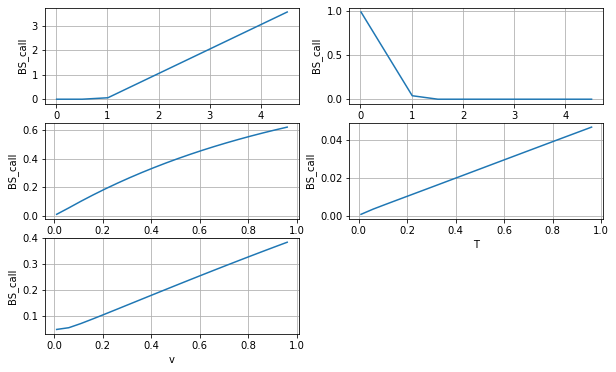

In [200]:
plt.figure(figsize=(10,6))

plt.subplot(3,2,1)
plt.plot(np.arange(0.01,5,0.5),BS_call(np.arange(0.01,5,0.5),K,r,T,v))
plt.xlabel('S0')
plt.ylabel('BS_call')
plt.grid()

plt.subplot(3,2,2)
plt.plot(np.arange(0.01,5,0.5),BS_call(S0,np.arange(0.01,5,0.5),r,T,v))
plt.xlabel('K')
plt.ylabel('BS_call')
plt.grid()

plt.subplot(3,2,3)
plt.plot(np.arange(0.01,1,0.05),BS_call(S0,K,np.arange(0.01,1,0.05),T,v))
plt.xlabel('r')
plt.ylabel('BS_call')
plt.grid()

plt.subplot(3,2,4)
plt.plot(np.arange(0.01,1,0.05),BS_call(S0,K,r,np.arange(0.01,1,0.05),v))
plt.xlabel('T')
plt.ylabel('BS_call')
plt.grid()

plt.subplot(3,2,5)
plt.plot(np.arange(0.01,1,0.05),BS_call(S0,K,r,T,np.arange(0.01,1,0.05)))
plt.xlabel('v')
plt.ylabel('BS_call')
plt.grid()

plt.show()

### Put Call Parity

European put and a call on the same underlying with same maturity and strike follow-

$c-p=S_0-Ke^{-rT}$

In [207]:
S0=1
K=1
r=0.05
T=1 # year
v=0.02

print(BS_call(S0,K,r,T,v)-BS_put(S0,K,r,T,v))
print(S0-K*np.exp(-r*T))

0.048770575499286
0.048770575499285984
